<a href="https://colab.research.google.com/github/SoRalenka/ORBBacktesting/blob/main/FinalOpeingRangeBreakout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pandas_ta
! pip install kiteconnect
! pip install seaborn
! pip install cufflinks
! pip install sklearn
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 KB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=59686218d93438cf0cbf3a5ecfbdfa80d1ef41191ac52ed3053cc1b106428099
  Stored in directory: /root/.cache/pip/wheels/54/4a/75/06b8e63fce6f6d2c1baae5c208edb18eca128407b0c96e1153
Successfully built pandas_ta
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.5/771.5 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.5 M

In [ ]:
! pip install python-docx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 50.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184505 sha256=7aff17bb680adbbc5e7949ecaf8f54b194e911c7ee591fe326b902d9735bd01a
  Stored in directory: /root/.cache/pip/wheels/32/b8/b2/c4c2b95765e615fe139b0b17b5ea7c0e1b6519b0a9ec8fb34d
Successfully built python-docx


In [ ]:
! pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.9 MB/s eta 0:00:00


In [ ]:
import os
import json
import pytz
import logging
import requests
import numpy as np
import pandas as pd
import pandas_ta as ta
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

from pprint import pprint
from kiteconnect import KiteConnect
from datetime import datetime, timedelta,time

logging.basicConfig(level=logging.DEBUG)

In [ ]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import  download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "colab"

In [ ]:
import yfinance as yf

# get the 10-year Treasury bond yield from Yahoo Finance
bond = yf.Ticker('^TNX')
bond_data = bond.history(period='max')
risk_free_rate = bond_data['Close'].iloc[-1] / 100

In [ ]:
# CONSTANTS
USER_ID               = '-'
API_KEY               = '-'
ACCESS_TOKEN          = '-'
ZERODHA_LOGIN_LAMBDA  = 'https://pgs2vmmxgb.execute-api.ap-south-1.amazonaws.com/default/MULTYFI_PROD_SINGULAR_login_lambda'

# API credentials
credentials = {
  "broker"      : "zerodha",
  "userID"      : "OU8828",
  "password"    : "Vats@7890071",
  "pin"         : "515151",
  "apiKey"      : "y7ypl6k1fboc5tb4",
  "secret"      : "8cb6g3sig5trpzfmuvf5woixgm1cjjga",
  "totpSecret"  : "SIMNVZWGSSJQAG7GZQGWIREPAKGQB2UW",
  "authType"    : "totp"
}

USER_ID = credentials['userID']
API_KEY = credentials['apiKey']
instrument = 'NSE:SBIN'
start_date = datetime(2015,2,2)
end_date = datetime(2023,2,15)
timeperiod = '5minute'

In [ ]:
# Making Call to LMABDA function and getting ACCESS_TOKEN
res = requests.post(ZERODHA_LOGIN_LAMBDA, json = credentials)
# res = res.json()
if(res.status_code==200):
  res = res.json()
  ACCESS_TOKEN = res['data']['accessToken']
else:
  print(" ERROR , while finding accessToken !!",res)
print(" ACCESS_TOKEN = ", ACCESS_TOKEN)


# Setting ACCESS_TOKEN in kiteconnect
kc = KiteConnect(api_key=API_KEY)
kc.set_access_token(ACCESS_TOKEN)

 ACCESS_TOKEN =  U4iR7QdBQj05BYLBJ8HIjSZ5E0RlyTrI


In [ ]:
# Setting ACCESS_TOKEN in kiteconnect
kc = KiteConnect(api_key=API_KEY)
kc.set_access_token(ACCESS_TOKEN)

# Funtion to get token from instrument
def getToken(instrument):
    response = kc.ltp([ instrument ])
    token = response[instrument]['instrument_token']
    return token


In [ ]:
INTZ = pytz.timezone('Asia/Kolkata')
def create_date(year , month , day):
  for i in range(90) :
    day=day - 1
    if day == 0:
      month = month - 1;
      day = 30
    if month == 0:
      year= year - 1
      month = 12
  return (year,month,day)

dates = [(2022,11,15)]

for i in range(48):
  n=len(dates)-1
  dates.append(create_date(dates[n][0],dates[n][1],dates[n][2]))

In [ ]:
def getdata(dates,instrument):
  startDate = ((datetime(2022,11,15)).replace(hour=9,minute=15,second=0))
  endDate   = (datetime(2023,2,15)).replace(hour=15,minute=30,second=0)  #if using the code in future change the value of date.now() to a more suitable value .
  v = kc.historical_data(getToken(instrument),startDate,endDate,"5minute")
  union_df = pd.DataFrame(v)
  for i in range(1,len(dates)):
    startDate = ((datetime(dates[i][0],dates[i][1],dates[i][2])).replace(hour=9,minute=15,second=0))
    endDate   = (datetime(dates[i-1][0],dates[i-1][1],dates[i-1][2])).replace(hour=15,minute=30,second=0)
    v = kc.historical_data(getToken(instrument),startDate,endDate,"5minute")
    df = pd.DataFrame(v)
    union_df = pd.concat([df,union_df],ignore_index=True)

  return union_df

In [ ]:
stocks_df =  getdata(dates,instrument)

In [ ]:
stocks_df['year'] = stocks_df['date']
for i in range(len(stocks_df['date'])):
  stocks_df['year'][i] = stocks_df['date'][i].year

stocks_df['day'] = stocks_df['open']
for i in range(len(stocks_df['date'])):
  stocks_df['day'][i] = stocks_df['date'][i].weekday()

In [ ]:
stocks_df.rename(columns={'date':'datetime'},inplace=True)

In [ ]:
stocks_df.head()

,datetime,open,high,low,close,volume,year,day
0,2015-02-02 09:15:00+05:30,309.30,309.40,307.05,308.95,713779,2015,0.0
1,2015-02-02 09:20:00+05:30,308.95,309.95,307.90,308.30,498461,2015,0.0
2,2015-02-02 09:25:00+05:30,308.50,311.10,308.25,310.30,435103,2015,0.0
3,2015-02-02 09:30:00+05:30,310.45,311.90,310.25,310.55,318451,2015,0.0
4,2015-02-02 09:35:00+05:30,310.50,311.15,310.05,310.25,242969,2015,0.0


In [ ]:
# Open Range Breakout

def ORB(df):
  balance = df['open'][len(df['datetime'])-1] * 6    #actual money we have
  equity = df['open'][len(df['datetime'])-1] * 6  #stocks we have
  Range_roof = 0
  Range_floor = 0
  stoploss = 0
  profit_margin_up = 0
  profit_margin_down = 0
  flag = 0
  # print(8)
  for i in range(len(df['datetime'])):
    # print(i)
    # Creating a range at the first candle of the market every day
    if (df['datetime'][i].time()==time(9,15)):
      Range_floor = min(df['open'][i] , df['close'][i])
      Range_roof = max(df['open'][i] , df['close'][i])
      stoploss = (df['open'][i] + df['close'][i])/2
      profit_margin_up = Range_roof + abs(df['open'][i] - df['close'][i])
      profit_margin_down = Range_floor - abs(df['open'][i] - df['close'][i])
      flag = 0
    # print(2)
    # Buy if  a candle breaks through the roof of the range
    if df['high'][i] > Range_roof and df['low'][i] < Range_roof and (flag == 0 or flag == 2):
      equity -= Range_roof * 5
      k = flag
      flag = 1
      if k == 2:
        flag = 0

    # Sell if a candle breaks though the floor of the range
    if df['low'][i] < Range_floor and df['high'][i] > Range_floor and (flag == 0 or flag == 1):
      equity += Range_floor * 5
      k = flag
      flag = 2
      if k == 1:
        flag = 0

    # The profit margin for bullish market is two times that of the range , if breached sell.
    # when breached create a new range there discard the previous one and return flag to zero
    if df['high'][i] > profit_margin_up and df['low'][i] < profit_margin_up and flag == 1:
      equity += profit_margin_up * 5
      flag = 0
      Range_floor = min(df['open'][i] , df['close'][i])
      Range_roof = max(df['open'][i] , df['close'][i])
      stoploss = (df['open'][i] + df['close'][i])/2
      profit_margin_up = Range_roof + abs(df['open'][i] - df['close'][i])
      profit_margin_down = Range_floor - abs(df['open'][i] - df['close'][i])
      continue

    # The profit margin for bearish market is two times that of the range , if breached buy.
    # when breached create a new range there discard the previous one and return flag to zero
    if df['low'][i] < profit_margin_down and df['high'][i] > profit_margin_down and flag == 2:
      equity -= profit_margin_down * 5
      flag = 0
      Range_floor = min(df['open'][i] , df['close'][i])
      Range_roof = max(df['open'][i] , df['close'][i])
      stoploss = (df['open'][i] + df['close'][i])/2
      profit_margin_up = Range_roof + abs(df['open'][i] - df['close'][i])
      profit_margin_down = Range_floor - abs(df['open'][i] - df['close'][i])
      continue

    # Square of teh market at 15:30 , sell stocks if you have bought them , buy stocks if you have sold them.
    if df['datetime'][i].time() == time(15 , 30):
      if flag == 1 :
        equity += df['open'][i] * 5
      elif flag == 2 :
         equity -= df['open'][i] *5
      flag = 0

  # # printing equity
  # print("\n start = {} \n end = {} \n equity = {} \n balanc = {} \n stocks traded = {} \n profit percentage = {}%"
  #                                         .format(df['datetime'][0],df['datetime'][len(df['datetime'])-1],equity,balance,5,((equity-balance)*100)//balance))
  profit_percentage = ((equity-balance)*100)//balance
  return profit_percentage


In [ ]:
print("Total return of the opening range breakout is {}%".format(ORB(stocks_df)))

Total return of the opening range breakout is 623.0%


In [ ]:
def yearly_analysis(df):
  years = [2015,2016,2017,2018,2019,2020,2021,2022]
  yearly_report = {}
  dftemp = pd.DataFrame()
  for i in range(len(years)):
    dftemp = df[df['year']==years[i]]
    dftemp.reset_index(inplace=True)
    dftemp.drop(['index'],axis=1,inplace = True)
    yearly_report[years[i]] = ORB(dftemp)
  return yearly_report

In [ ]:
yearly_report = yearly_analysis(stocks_df)

In [ ]:
def day_of_the_week(df):
  weekday = ['monday','tuesday','wednesday','thrusday','friday']
  day_report = {}
  dftemp = pd.DataFrame()
  for i in range(len(weekday)):
    dftemp = df[df['day']==i]
    dftemp.reset_index(inplace=True)
    dftemp.drop(['index'],axis=1,inplace = True)
    day_report[weekday[i]] = ORB(dftemp)
  return day_report

In [ ]:
print(day_of_the_week(stocks_df))

{'monday': -125.0, 'tuesday': 669.0, 'wednesday': -180.0, 'thrusday': -428.0, 'friday': 643.0}


In [ ]:
day_of_the_week_report = day_of_the_week(stocks_df)

In [ ]:
def daily_analysis(df):
  profit = []
  dftemp = pd.DataFrame()
  for i in range(0,len(df['datetime']),75):
    dftemp = df.iloc[i:i+75]
    dftemp.reset_index(inplace = True)
    dftemp.drop(['index'] , axis = 1 ,inplace = True)
    profit.append(ORB(dftemp))
  return profit

In [ ]:
def yearly_week_analysis(df):
  years = [2015,2016,2017,2018,2019,2020,2021,2022]
  yearly_report = {}
  dftemp = pd.DataFrame()
  for i in range(len(years)):
    dftemp = df[df['year']==years[i]]
    dftemp.reset_index(inplace=True)
    dftemp.drop(['index'],axis=1,inplace = True)
    profitpercentage = []
    weeklydf = pd.DataFrame()
    for j in range(0 ,len(dftemp['datetime']),375):
      # print(dftemp.head(2))
      weeklydf = dftemp.iloc[j:j+375]
      weeklydf.reset_index(inplace = True)
      weeklydf.drop(['index'] , axis = 1 ,inplace = True)
      # print(weeklydf.head(3),"===============\n")
      profitpercentage.append(ORB(weeklydf))
    yearly_report[years[i]] = profitpercentage
  return yearly_report


In [ ]:
print(yearly_week_analysis(stocks_df))
yearly_week_report = yearly_week_analysis(stocks_df)

{2015: [90.0, -164.0, 0.0, -245.0, 86.0, 253.0, 83.0, 83.0, 1.0, -83.0, -1.0, -164.0, -85.0, -1.0, -86.0, 82.0, 88.0, -86.0, -1.0, -2.0, 80.0, 83.0, -165.0, 82.0, -83.0, -80.0, -7.0, -87.0, 238.0, -177.0, 0.0, -4.0, 0.0, 83.0, -1.0, -84.0, -2.0, 0.0, -258.0, 83.0, -84.0, -1.0, -87.0, -1.0, 83.0, -2.0], 2016: [0.0, -88.0, 80.0, -90.0, -80.0, 3.0, 82.0, -88.0, 95.0, 163.0, 1.0, -85.0, -3.0, 77.0, 238.0, 2.0, -2.0, -5.0, 85.0, 76.0, -5.0, 84.0, -8.0, 77.0, -5.0, 79.0, 0.0, 84.0, -4.0, -3.0, -6.0, -1.0, 82.0, -162.0, 84.0, 80.0, -1.0, -6.0, -168.0, 82.0, 88.0, 82.0, -255.0, -85.0, 80.0, 81.0, -84.0, 1.0, 82.0, 83.0], 2017: [-84.0, 82.0, -88.0, 78.0, 161.0, -1.0, 84.0, 81.0, 83.0, -80.0, -2.0, -1.0, 82.0, 0.0, 81.0, -171.0, 3.0, -3.0, 77.0, 2.0, -2.0, -1.0, 166.0, -84.0, 169.0, 1.0, 165.0, -1.0, -1.0, -84.0, -86.0, 84.0, 83.0, 82.0, 83.0, -85.0, -86.0, -86.0, 84.0, 168.0, 167.0, 161.0, -3.0, 76.0, 164.0, -1.0, -168.0, -168.0, 81.0, -86.0], 2018: [-167.0, -2.0, 1.0, 168.0, -1.0, -3.0, -261.0

In [ ]:
def calmar_ratio(returns, risk_free_rate):
    cumulative_return = 1
    max_drawdown = 0
    prev_peak = 1
    for r in returns:
        cumulative_return *= 1 + r
        drawdown = 1 - (cumulative_return / prev_peak)
        if drawdown > max_drawdown:
            max_drawdown = drawdown
        if cumulative_return > prev_peak:
            prev_peak = cumulative_return
    ann_return = (cumulative_return ** (1/len(returns))) - 1
    calmar_ratio = (ann_return - risk_free_rate) / max_drawdown
    return calmar_ratio

In [ ]:
def sortino_ratio(returns , risk_free_rate):
    avg_return = sum(returns) / len(returns)
    downside_returns = [r for r in returns if r < 0]
    downside_deviation = 0
    for r in downside_returns:
        downside_deviation += (r - avg_return)**2
    downside_deviation = (downside_deviation / len(downside_returns))**0.5
    sortino_ratio = (avg_return - risk_free_rate) / downside_deviation
    return sortino_ratio

In [ ]:
def max_drawdown(prices):
    max_value = 0
    max_drawdown = 0
    for i in range(1, len(prices)):
        if prices[i] > prices[max_value]:
            max_value = i
        else:
            drawdown = (prices[i] - prices[max_value]) / prices[max_value]
            if drawdown < max_drawdown:
                max_drawdown = drawdown

    return max_drawdown * 100

In [ ]:
def sharpe_ratio(returns, risk_free_rate):

    average_return = np.mean(returns)
    standard_deviation = np.std(returns)
    excess_return = average_return - risk_free_rate
    sharpe_ratio = excess_return / standard_deviation

    return sharpe_ratio

In [ ]:
def average_drawdown(prices):
    drawdowns = []
    max_value = 0
    for i in range(1, len(prices)):
        if prices[i] > prices[max_value]:
            max_value = i
        else:
            drawdowns.append((prices[i] - prices[max_value]) / prices[max_value])
    if len(drawdowns) == 0:
        return 0
    return sum(drawdowns) / len(drawdowns) * 100




In [ ]:
yearly_return_report = list(yearly_report.values())

In [ ]:
def ORB2(df):
  balance = df['open'][len(df['datetime'])-1] * 6 #actual money we have
  equity = df['open'][len(df['datetime'])-1] * 6   #stocks we have
  Range_roof = 0
  Range_floor = 0
  stoploss = 0
  profit_margin_up = 0
  profit_margin_down = 0
  flag = 0
  dictnew = {df['datetime'][0] : equity}
  # print(8)
  for i in range(len(df['datetime'])):
    # Creating a range at the first candle of the market every day
    if (df['datetime'][i].time()==time(9,15)):
      Range_floor = min(df['open'][i] , df['close'][i])
      Range_roof = max(df['open'][i] , df['close'][i])
      stoploss = (df['open'][i] + df['close'][i])/2
      profit_margin_up = Range_roof + abs(df['open'][i] - df['close'][i])
      profit_margin_down = Range_floor - abs(df['open'][i] - df['close'][i])
      flag = 0
    # print(2)
    # Buy if  a candle breaks through the roof of the range
    if df['high'][i] > Range_roof and df['low'][i] < Range_roof and (flag == 0 or flag == 2):
      equity -= Range_roof * 5
      k = flag
      flag = 1
      if k == 2:
        dictnew[df['datetime'][i]] = equity
        flag = 0

    # Sell if a candle breaks though the floor of the range
    if df['low'][i] < Range_floor and df['high'][i] > Range_floor and (flag == 0 or flag == 1):
      equity += Range_floor * 5
      k = flag
      flag = 2
      if k == 1:
        dictnew[df['datetime'][i]] = equity
        flag = 0

    # The profit margin for bullish market is two times that of the range , if breached sell.
    # when breached create a new range there discard the previous one and return flag to zero
    if df['high'][i] > profit_margin_up and df['low'][i] < profit_margin_up and flag == 1:
      equity += profit_margin_up * 5
      flag = 0
      Range_floor = min(df['open'][i] , df['close'][i])
      Range_roof = max(df['open'][i] , df['close'][i])
      stoploss = (df['open'][i] + df['close'][i])/2
      profit_margin_up = Range_roof + abs(df['open'][i] - df['close'][i])
      profit_margin_down = Range_floor - abs(df['open'][i] - df['close'][i])
      dictnew[df['datetime'][i]] = equity
      continue

    # The profit margin for bearish market is two times that of the range , if breached buy.
    # when breached create a new range there discard the previous one and return flag to zero
    if df['low'][i] < profit_margin_down and df['high'][i] > profit_margin_down and flag == 2:
      equity -= profit_margin_down * 5
      flag = 0
      Range_floor = min(df['open'][i] , df['close'][i])
      Range_roof = max(df['open'][i] , df['close'][i])
      stoploss = (df['open'][i] + df['close'][i])/2
      profit_margin_up = Range_roof + abs(df['open'][i] - df['close'][i])
      profit_margin_down = Range_floor - abs(df['open'][i] - df['close'][i])
      dictnew[df['datetime'][i]] = equity
      continue

    # Square of teh market at 15:30 , sell stocks if you have bought them , buy stocks if you have sold them.
    if df['datetime'][i].time() == time(15 , 30):
      if flag == 1 :
        equity += df['open'][i] * 5
        dictnew[df['datetime'][i]] = equity
      elif flag == 2 :
         equity -= df['open'][i] *5
         dictnew[df['datetime'][i]] = equity
      flag = 0

  # # printing equity
  # print("\n start = {} \n end = {} \n equity = {} \n balanc = {} \n stocks traded = {} \n profit percentage = {}%"
  #                                         .format(df['datetime'][0],df['datetime'][len(df['datetime'])-1],equity,balance,5,((equity-balance)*100)//balance))
  profit_percentage = ((equity-balance)*100)//balance
  print(profit_percentage)
  return dictnew

In [ ]:
orbdf = ORB2(stocks_df)

623.0


In [ ]:
df_performance = pd.DataFrame.from_dict(orbdf ,orient='index')
df_performance.reset_index(inplace=True)
df_performance.rename(columns = {'index':'datetime'},inplace=True)
df_performance.rename(columns = {0:'value'},inplace=True)

In [ ]:
! pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_performance.iplot(x='datetime',y='value')

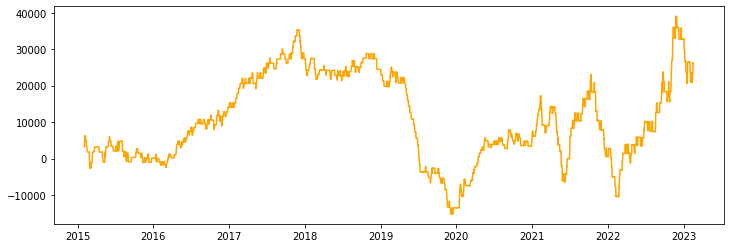

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df_performance['datetime'], df_performance['value'],color='orange')
fig.savefig('new_plot.png')


In [ ]:
ORB_values = list(orbdf.values())

In [ ]:
temp = list(yearly_week_report.values())

In [ ]:
returns = []
for i in range(len(temp)):
  for j in range(len(temp[i])):
    returns.append(temp[i][j])

In [ ]:
print("sharpe ratio = {} \ncalmar ratio = {}\nSortino ratio = {}".format(sharpe_ratio(returns,risk_free_rate),
                                                                          calmar_ratio(returns,risk_free_rate),
                                                                         sortino_ratio(returns,risk_free_rate)))

sharpe ratio = 0.03160819371787774 
calmar ratio = -0.006336707327424027
Sortino ratio = 0.03262444450410319


In [ ]:
daily_report = daily_analysis(stocks_df)

In [ ]:
print(daily_report)

[82.0, -1.0, 85.0, 0.0, -84.0, -1.0, -2.0, -84.0, 0.0, -85.0, -1.0, 0.0, 0.0, 0.0, -1.0, 0.0, -84.0, -85.0, -83.0, 0.0, 0.0, -1.0, 85.0, -1.0, 0.0, -1.0, 84.0, 82.0, 1.0, 83.0, -1.0, 82.0, 0.0, -85.0, -1.0, 83.0, -84.0, -1.0, -1.0, 82.0, 0.0, -1.0, 83.0, 0.0, 0.0, 0.0, -84.0, -1.0, -1.0, -1.0, -1.0, 0.0, 0.0, -1.0, -1.0, 83.0, 0.0, 83.0, -1.0, -1.0, 83.0, -84.0, -85.0, -1.0, -84.0, 82.0, -85.0, -1.0, -84.0, -84.0, -1.0, 82.0, -84.0, -1.0, -84.0, -83.0, 82.0, -1.0, 83.0, -1.0, -84.0, 0.0, 0.0, 84.0, 83.0, 0.0, -1.0, -84.0, 83.0, -1.0, 83.0, 83.0, -1.0, 0.0, -1.0, -1.0, -2.0, 83.0, 83.0, 0.0, 82.0, -1.0, -84.0, -1.0, -1.0, 0.0, -84.0, -84.0, -85.0, -1.0, 83.0, 83.0, -84.0, -84.0, -1.0, 83.0, 83.0, -1.0, -1.0, -1.0, 82.0, -84.0, 0.0, -84.0, -84.0, -84.0, -1.0, 82.0, 0.0, 83.0, -84.0, -84.0, 83.0, -84.0, -1.0, -3.0, -84.0, -84.0, -1.0, -1.0, -84.0, 0.0, -85.0, 83.0, 83.0, 83.0, 82.0, -1.0, -1.0, 0.0, -1.0, 0.0, 83.0, -1.0, 0.0, 0.0, -84.0, -1.0, -84.0, -84.0, -1.0, -1.0, 0.0, -1.0, -1.0, 0

In [ ]:

print("Yearly analysis of ORB stratedy\n''''''''''''''''''''''''''''''''''''")
for key,value in yearly_report.items():
  print(key,"\t",value)
print("\n\nYearly week analysis of ORB stratedy\n''''''''''''''''''''''''''''''''''''")
for key,value in yearly_week_report.items():
  print(key,"\t",value)

print("\n\nDay of the week analysis of ORB stratedy\n''''''''''''''''''''''''''''''''''''")
for key,value in day_of_the_week_report.items():
  print(key,"\t",value)

print("\n\nDaily analysis of ORB stratedy\n''''''''''''''''''''''''''''''''''''")
print(daily_report)
print("\n\nVarious other factors\n''''''''''''''''''''''''''''''''''''")
print("sharpe ratio = {} \ncalmar ratio = {}\nSortino ratio = {}\nMaximum Drawdown = {}% \nAverage Drawdown = {}%".format(sharpe_ratio(daily_report,risk_free_rate),
                                                                                                                          calmar_ratio(daily_report,risk_free_rate),
                                                                                                                          sortino_ratio(daily_report,risk_free_rate),
                                                                                                                          max_drawdown(daily_report),
                                                                                                                          average_drawdown(daily_report)))

Yearly analysis of ORB stratedy
''''''''''''''''''''''''''''''''''''
2015 	 -235.0
2016 	 1013.0
2017 	 648.0
2018 	 -165.0
2019 	 -1896.0
2020 	 1276.0
2021 	 -253.0
2022 	 874.0


Yearly week analysis of ORB stratedy
''''''''''''''''''''''''''''''''''''
2015 	 [90.0, -164.0, 0.0, -245.0, 86.0, 253.0, 83.0, 83.0, 1.0, -83.0, -1.0, -164.0, -85.0, -1.0, -86.0, 82.0, 88.0, -86.0, -1.0, -2.0, 80.0, 83.0, -165.0, 82.0, -83.0, -80.0, -7.0, -87.0, 238.0, -177.0, 0.0, -4.0, 0.0, 83.0, -1.0, -84.0, -2.0, 0.0, -258.0, 83.0, -84.0, -1.0, -87.0, -1.0, 83.0, -2.0]
2016 	 [0.0, -88.0, 80.0, -90.0, -80.0, 3.0, 82.0, -88.0, 95.0, 163.0, 1.0, -85.0, -3.0, 77.0, 238.0, 2.0, -2.0, -5.0, 85.0, 76.0, -5.0, 84.0, -8.0, 77.0, -5.0, 79.0, 0.0, 84.0, -4.0, -3.0, -6.0, -1.0, 82.0, -162.0, 84.0, 80.0, -1.0, -6.0, -168.0, 82.0, 88.0, 82.0, -255.0, -85.0, 80.0, 81.0, -84.0, 1.0, 82.0, 83.0]
2017 	 [-84.0, 82.0, -88.0, 78.0, 161.0, -1.0, 84.0, 81.0, 83.0, -80.0, -2.0, -1.0, 82.0, 0.0, 81.0, -171.0, 3.0, -3.0, 77.0

In [ ]:
new_instrument = instrument.replace(":", "_" )

In [ ]:
factor_dict = {}
factor_dict['Total Return'] = ORB(stocks_df)
factor_dict['sharpe ratio'] = sharpe_ratio(daily_report,risk_free_rate)
factor_dict['calmar ratio'] = calmar_ratio(daily_report,risk_free_rate)
factor_dict['Sortino ratio'] = sortino_ratio(daily_report,risk_free_rate)
factor_dict['Maximum Drawdown(%)'] =  max_drawdown(daily_report)
factor_dict['Average Drawdown(%)'] = average_drawdown(daily_report)

In [ ]:
# Max. Drawdown Duration      688 days 00:00:00
# Avg. Drawdown Duration       41 days 00:00:00
# # Trades                                   93
# Win Rate [%]                            53.76
# Best Trade [%]                          57.12
# Worst Trade [%]                        -16.63
# Avg. Trade [%]                           1.96
# Max. Trade Duration         121 days 00:00:00
# Avg. Trade Duration          32 days 00:00:00
# Profit Factor                            2.13
# Expectancy [%]                           6.91
# SQN                                      1.78
# _strategy              SmaCross(n1=10, n2=20)



In [ ]:
print(factor_dict.items())

dict_items([('Total Return', 623.0), ('sharpe ratio', 0.06081724508183399), ('calmar ratio', -1.0392200016975404), ('Sortino ratio', 0.06314666078622273), ('Maximum Drawdown(%)', -201.1764705882353), ('Average Drawdown(%)', -96.47761612304807)])


In [ ]:
! pip install weasyprint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.5/265.5 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 KB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.3/704.3 KB 57.7 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [ ]:
from docx import Document
from docx.shared import Inches
document = Document()

document.add_heading('Opening range breakout\n')
document.add_paragraph('''In opening range breakout we take the first candle’s high and low as the upper and lower bound of the range.
The profit margin is taken as the 2 times that of the range both above and below the upper and lower bounds.
If the high of a candle breaks through the upper bound of the range , we buy the stock.
The stoploss for this buy is the lower bound of the range.
If the high of another candle touches the profit margin , create a new range on the next candle .
Recalculate the range boundaries and the profit margins.''')
document.add_paragraph("""

      This creates profit in the case of a bullish market with a risk to reward ratio of 1:2.
If the low of a candle breaks through the  lower bound of the range you should sell the shares.
Stoploss of this is the upper bound which if touched should mean you should buy the shares back.
If the shares touch the profit margin buy the shares and create a new range on the next candle and recalculate the profit margin and range boundaries. This will create a profit in case of a bearish market and give a risk to reward ratio of 1:2.
Loss in Opening Range breakout can only happen in case of a market which is in range.

                        """)

document.add_heading('\n\nPerformance of ORB stratefy\n',level=2)
document.add_picture("/content/new_plot.png",width=Inches(5),height=Inches(2))

document.add_heading('\n\nYearly return analysis\n',level=2)
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Year'
hdr_cells[1].text = 'Return'
for key, value in yearly_report.items():
    row_cells = table.add_row().cells
    row_cells[0].text = str(key)
    row_cells[1].text = str(value)

document.add_heading("\n\nDay of the week analysis\n",level=2)
table = document.add_table(rows=1,cols=2)
hr_cells = table.rows[0].cells
hr_cells[0].text = "Day"
hr_cells[1].text = "Return"
for key, value in day_of_the_week_report.items():
    row_cells = table.add_row().cells
    row_cells[0].text = str(key)
    row_cells[1].text = str(value)

document.add_page_break()

document.add_heading("\n\nSome other important factors\n",level=2)
table = document.add_table(rows=1,cols=2)
h_cells = table.rows[0].cells
h_cells[0].text = "Factors"
h_cells[1].text = "values"

for key, value in factor_dict.items():
    row_cells = table.add_row().cells
    row_cells[0].text = str(key)
    row_cells[1].text = str(value)

document.add_heading("\n\nYearly week-wise analysis\n",level=2)

table = document.add_table(rows=8,cols=2)

i=0
j=0
for row  in table.rows:
  row.cells[0].text = str(list(yearly_week_report.keys())[i])
  nested_table = row.cells[1].add_table(rows=10, cols=5)
  for nested_row in nested_table.rows:
    for cell in nested_row.cells:
      if (j>=len(list(yearly_week_report.values())[0])):break
      cell.text = str(list(yearly_week_report.values())[i][j])
      j+=1

  j=0
  i+=1


name = new_instrument + '.docx'
document.save(name)




In [ ]:
!pip install reportlab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 38.2 MB/s eta 0:00:00


In [ ]:
from reportlab.lib.pagesizes import letter
from reportlab.lib.units import inch
from reportlab.pdfgen import canvas
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle, Image,PageBreak
from reportlab.lib.enums import TA_CENTER
from reportlab.lib import colors

# Define the PDF filename
filename = instrument + ".pdf"

# Define the document title, paragraphs, and table data as lists or dictionaries
document_title = "Opening Range Breakout"
paragraphs = [
    '''In opening range breakout we take the first candle’s high and low as the upper and lower bound of the range.
The profit margin is taken as the 2 times that of the range both above and below the upper and lower bounds.
If the high of a candle breaks through the upper bound of the range , we buy the stock.
The stoploss for this buy is the lower bound of the range.
If the high of another candle touches the profit margin , create a new range on the next candle .
Recalculate the range boundaries and the profit margins.''',
    """

      This creates profit in the case of a bullish market with a risk to reward ratio of 1:2.
If the low of a candle breaks through the  lower bound of the range you should sell the shares.
Stoploss of this is the upper bound which if touched should mean you should buy the shares back.
If the shares touch the profit margin buy the shares and create a new range on the next candle and recalculate the profit margin and range boundaries. This will create a profit in case of a bearish market and give a risk to reward ratio of 1:2.
Loss in Opening Range breakout can only happen in case of a market which is in range.

                        """
]
# table_data = [("factor", "Value")]
# data_dict = factor_dict
# for key, value in data_dict.items():
#     table_data.append((key, str(value)))



image_filename = "new_plot.png"

# Create the PDF file using ReportLab
pdf = SimpleDocTemplate(filename, pagesize=letter)
story = []

# Define the document styles using ReportLab's built-in styles
styles = getSampleStyleSheet()
title_style = styles["Title"]
heading_style = styles["Heading1"]
heading_style2 = styles["Heading2"]
normal_style = styles["Normal"]

# Add the title to the document
title = Paragraph(document_title, title_style)
story.append(title)
story.append(Spacer(1, 0.5 * inch))

# Add the paragraphs to the document
for paragraph in paragraphs:
    p = Paragraph(paragraph, normal_style)
    story.append(p)
    story.append(Spacer(1, 0.2 * inch))



title = Paragraph("Chart showing performance of ORB throughout the years", heading_style2)
story.append(title)
story.append(Spacer(1, 0.2 * inch))
# Add the image to the document
image = Image(image_filename, width=12*inch/2, height=4*inch/2)
story.append(image)

data1 = [("factor", "Value")]
for key, value in factor_dict.items():
  data1.append((key, str(value)))

data2 = [("Year","Return")]
for key,value in yearly_report.items():
  data2.append((key,str(value)))

data3 = [("Day","Return")]
for key,value in day_of_the_week_report.items():
  data3.append((key,str(value)))


table_style = TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.grey),
                          ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
                          ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                          ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                          ('FONTSIZE', (0, 0), (-1, 0), 14),
                          ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
                          ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
                          ('TEXTCOLOR', (0, 1), (-1, -1), colors.black),
                          ('FONTNAME', (0, 1), (-1, -1), 'Helvetica'),
                          ('FONTSIZE', (0, 1), (-1, -1), 12),
                          ('BOTTOMPADDING', (0, 1), (-1, -1), 6),
                          ('GRID', (0, 0), (-1, -1), 1, colors.black)])

style = TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.grey),
                    ('GRID', (0, 0), (-1, -1), 1, colors.black),
                    ('TEXTCOLOR', (0,0), (-1,-1), colors.black),])

data4 = [("Year" , "Weekly Return Report")]
for key , value in yearly_week_report.items():
  tempdata = []
  # print(len(list(value)))
  tempdata.append(('1','2','3','4'))
  for i in range(0,len(list(value)),4):
    # print(i,i+1,i+2,i+3)
    if (i+2 == len(list(value))):
      break
    if (i+3 == len(list(value))):
      break
    tempdata.append((str(value[i]) , str(value[i+1]),str(value[i+2]),str(value[i+3])))
  temptable = Table(tuple(tempdata))
  for i in range(1,len(tempdata)):
    for j in range(len(tempdata[i])):

        if float(tempdata[i][j]) >= 0.0:
            # print(tempdata[i][j],True , end=" ")
            style.add('BACKGROUND', (j,i), (j,i), colors.green)
        else:
            # print(tempdata[i][j] ,False, end=" ")
            style.add('BACKGROUND', (j,i), (j,i), colors.red)
    # print()
  temptable.setStyle(style)
  data4.append((str(key) ,temptable))

# Create the table objects
table1 = Table(data1)
table2 = Table(data2)
table3 = Table(data3)
table4 = Table(data4)
# Apply the table styles to the tables
table1.setStyle(table_style)
table2.setStyle(table_style)
table3.setStyle(table_style)
table4.setStyle(table_style)

# Adding the Tables to the pdf
title = Paragraph("Important Factors", heading_style2)
story.append(title)
story.append(Spacer(1, 0.2 * inch))
story.append(table1)
story.append(Spacer(1, 0.2 * inch))
title = Paragraph("Yearly Return Report", heading_style2)
story.append(title)
story.append(Spacer(1, 0.2 * inch))
story.append(table2)
story.append(Spacer(1, 0.2 * inch))
title = Paragraph("Day of the week Report", heading_style2)
story.append(title)
story.append(Spacer(1, 0.2 * inch))
story.append(table3)
story.append(Spacer(1, 0.2 * inch))
story.append(PageBreak())
title = Paragraph("Yearly Week Report", heading_style2)
story.append(title)
story.append(Spacer(1, 0.2 * inch))
story.append(table4)


# Build the PDF file and save it to disk
pdf.build(story)
print("PDF generated successfully!")


PDF generated successfully!


In [ ]:


def ORB_daily(date ,  instrument , timeperiod):
  start = date.replace(hour=9,minute=15,second=0)
  end = date.replace(hour=15,minute=30,second=0)
  v = kc.historical_data(getToken(instrument),start,end,timeperiod)
  df = pd.DataFrame(v)
  flag = 0
  entry_time ,entry_price , exit_time , exit_price,profit,symbol = 0,0,0,0,0,0
  results = pd.DataFrame(columns=[ 'symbol','entry_time', 'entry_price', 'exit_time', 'exit_price', 'profit'])
  if (df.empty): return results
  Range_floor = min(df['open'][0] , df['close'][0])
  Range_roof = max(df['open'][0] , df['close'][0])
  profit_margin_up = Range_roof + abs(df['open'][0] - df['close'][0])
  profit_margin_down = Range_floor - abs(df['open'][0] - df['close'][0])
  # print(len(df['date']))
  # print(Range_floor,Range_roof,profit_margin_up , profit_margin_down)
  for i in range(1,len(df['date'])):
    # print(Range_floor)
    if df['high'][i] > Range_roof and df['low'][i] < Range_roof and (flag == 0 or flag == 2):
      if flag==0 : # if flag ==0 then it means we have to buy stocks
        point = df['close'][i]
        entry_time =  df['date'][i]
        entry_price = df['close'][i]
        flag = 1
        symbol = "buy"
      if flag == 2 :
        exit_time = df['date'][i]
        exit_price = df['close'][i]
        flag = 0
        profit = entry_price - exit_price
        results = results.append({'symbol': symbol ,'entry_time': entry_time, 'entry_price': entry_price,
                                  'exit_time': exit_time, 'exit_price': exit_price, 'profit': profit},
                                 ignore_index=True)
      continue

    if df['low'][i] < Range_floor and df['high'][i] > Range_floor and (flag == 0 or flag == 1):
      if flag == 0 :
        entry_time = df['date'][i]
        entry_price = df['close'][i]
        flag = 2
        symbol = "short"
      if flag == 1:
        exit_time = df['date'][i]
        exit_price = df['close'][i]
        flag = 0
        profit = exit_price-entry_price
        results = results.append({'symbol': symbol ,'entry_time': entry_time, 'entry_price': entry_price,
                                  'exit_time': exit_time, 'exit_price': exit_price, 'profit': profit},
                                 ignore_index=True)
      continue
    if df['high'][i] > profit_margin_up and df['low'][i] < profit_margin_up and flag == 1:
      exit_time = df['date'][i]
      exit_price = df['close'][i]
      profit =exit_price - entry_price
      results = results.append({'symbol': symbol ,'entry_time': entry_time, 'entry_price': entry_price,
                                  'exit_time': exit_time, 'exit_price': exit_price, 'profit': profit},
                                 ignore_index=True)
      flag = 0
      Range_floor = min(df['open'][i] , df['close'][i])
      Range_roof = max(df['open'][i] , df['close'][i])
      profit_margin_up = Range_roof + abs(df['open'][i] - df['close'][i])
      profit_margin_down = Range_floor - abs(df['open'][i] - df['close'][i])
      continue

    if df['low'][i] < profit_margin_down and df['high'][i] > profit_margin_down and flag == 2:
      exit_time = df['date'][i]
      exit_price = df['close'][i]
      profit =  entry_price - exit_price
      results = results.append({'symbol': symbol ,'entry_time': entry_time, 'entry_price': entry_price,
                                  'exit_time': exit_time, 'exit_price': exit_price, 'profit': profit},
                                 ignore_index=True)
      flag = 0
      Range_floor = min(df['open'][i] , df['close'][i])
      Range_roof = max(df['open'][i] , df['close'][i])
      profit_margin_up = Range_roof + abs(df['open'][i] - df['close'][i])
      profit_margin_down = Range_floor - abs(df['open'][i] - df['close'][i])
      continue

  return results

result_df = ORB_daily(datetime(2023,2,15) , instrument , "5minute")


In [ ]:
result_df.head(75)

,symbol,entry_time,entry_price,exit_time,exit_price,profit
0,buy,2023-02-15 09:20:00+05:30,543.00,2023-02-15 09:25:00+05:30,541.05,-1.95
1,short,2023-02-15 09:30:00+05:30,541.50,2023-02-15 09:35:00+05:30,539.75,1.75
2,short,2023-02-15 09:40:00+05:30,540.65,2023-02-15 09:45:00+05:30,541.25,-0.60
3,buy,2023-02-15 09:50:00+05:30,540.90,2023-02-15 10:40:00+05:30,542.30,1.40
4,buy,2023-02-15 10:45:00+05:30,542.80,2023-02-15 10:55:00+05:30,541.90,-0.90
5,buy,2023-02-15 11:00:00+05:30,543.15,2023-02-15 11:05:00+05:30,542.95,-0.20
6,buy,2023-02-15 11:10:00+05:30,543.60,2023-02-15 11:15:00+05:30,543.45,-0.15
7,buy,2023-02-15 11:20:00+05:30,543.80,2023-02-15 11:25:00+05:30,542.90,-0.90
8,buy,2023-02-15 11:30:00+05:30,543.70,2023-02-15 11:35:00+05:30,544.00,0.30


In [ ]:
result_df.iplot(x="exit_time" , y='profit')

In [ ]:

def get_weekday_dates(start_date, end_date):
    weekday_dates = []
    current_date = start_date
    while current_date <= end_date:
        if current_date.weekday() < 5:
            weekday_dates.append(current_date)
        current_date = current_date + timedelta(days=1)
    return weekday_dates


In [ ]:
def getfulldata(start_date , end_date , instrument , timeperiod):
  dates = get_weekday_dates(start_date , end_date)
  union_DF = pd.DataFrame()
  for i in dates:
    temp_df = ORB_daily(i,instrument,timeperiod)
    union_DF = pd.concat([union_DF, temp_df], axis=0,ignore_index = True)

  return union_DF

In [ ]:
fulldata = getfulldata(start_date , end_date , instrument , timeperiod)

In [ ]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14219 entries, 0 to 14218
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype                                
---  ------       --------------  -----                                
 0   symbol       14219 non-null  object                               
 1   entry_time   14219 non-null  datetime64[ns, tzoffset(None, 19800)]
 2   entry_price  14219 non-null  float64                              
 3   exit_time    14219 non-null  datetime64[ns, tzoffset(None, 19800)]
 4   exit_price   14219 non-null  float64                              
 5   profit       14219 non-null  float64                              
dtypes: datetime64[ns, tzoffset(None, 19800)](2), float64(3), object(1)
memory usage: 666.6+ KB
